In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Đọc dữ liệu

In [59]:
df_train = pd.read_csv("../train.csv")
df_test = pd.read_csv("../test.csv")

# 2. Giải thích biến

In [60]:
feature_descriptions = {
    "person_age": "Tuổi của người vay",
    "person_income": "Tổng thu nhập hàng năm",
    "person_emp_length": "Số năm đi làm",
    "loan_amnt": "Số tiền vay",
    "loan_int_rate": "Lãi suất vay",
    "loan_percent_income": "Tỷ lệ phần trăm thu nhập dùng để trả nợ",
    "cb_person_cred_hist_length": "Lịch sử tín dụng (năm)",
    "person_home_ownership": "Tình trạng sở hữu nhà (RENT, OWN, MORTGAGE...)",
    "loan_intent": "Mục đích vay",
    "loan_grade": "Xếp hạng khoản vay (A-E)",
    "cb_person_default_on_file": "Từng vỡ nợ trong quá khứ (Y/N)",
    "loan_status": "Trạng thái vay (0 = Từ chối, 1 = Duyệt)"
}
# Install tabulate if not already installed
# !pip install tabulate

from tabulate import tabulate

# Convert dictionary to list of tuples
feature_table = [[feature, description] for feature, description in feature_descriptions.items()]

# Create headers
headers = ["Feature", "Mô tả"]

# Display table using tabulate
print(tabulate(feature_table, headers=headers, tablefmt="pretty", stralign="left"))

+----------------------------+------------------------------------------------+
| Feature                    | Mô tả                                          |
+----------------------------+------------------------------------------------+
| person_age                 | Tuổi của người vay                             |
| person_income              | Tổng thu nhập hàng năm                         |
| person_emp_length          | Số năm đi làm                                  |
| loan_amnt                  | Số tiền vay                                    |
| loan_int_rate              | Lãi suất vay                                   |
| loan_percent_income        | Tỷ lệ phần trăm thu nhập dùng để trả nợ        |
| cb_person_cred_hist_length | Lịch sử tín dụng (năm)                         |
| person_home_ownership      | Tình trạng sở hữu nhà (RENT, OWN, MORTGAGE...) |
| loan_intent                | Mục đích vay                                   |
| loan_grade                 | Xếp hạng 

# 3. Dùng hàm describe

In [61]:
df_train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


# 4. Phân phối của đặc trưng mục tiêu

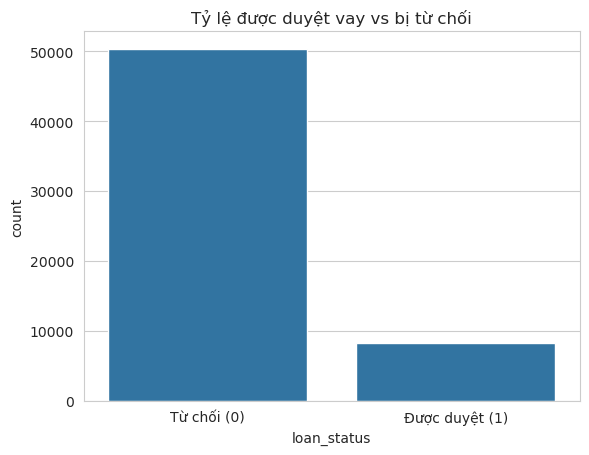

In [62]:
sns.countplot(data=df_train, x='loan_status')
plt.title('Tỷ lệ được duyệt vay vs bị từ chối')
plt.xticks([0,1], ['Từ chối (0)', 'Được duyệt (1)'])
plt.show()

# 5. Phân phối của các đặc trưng số

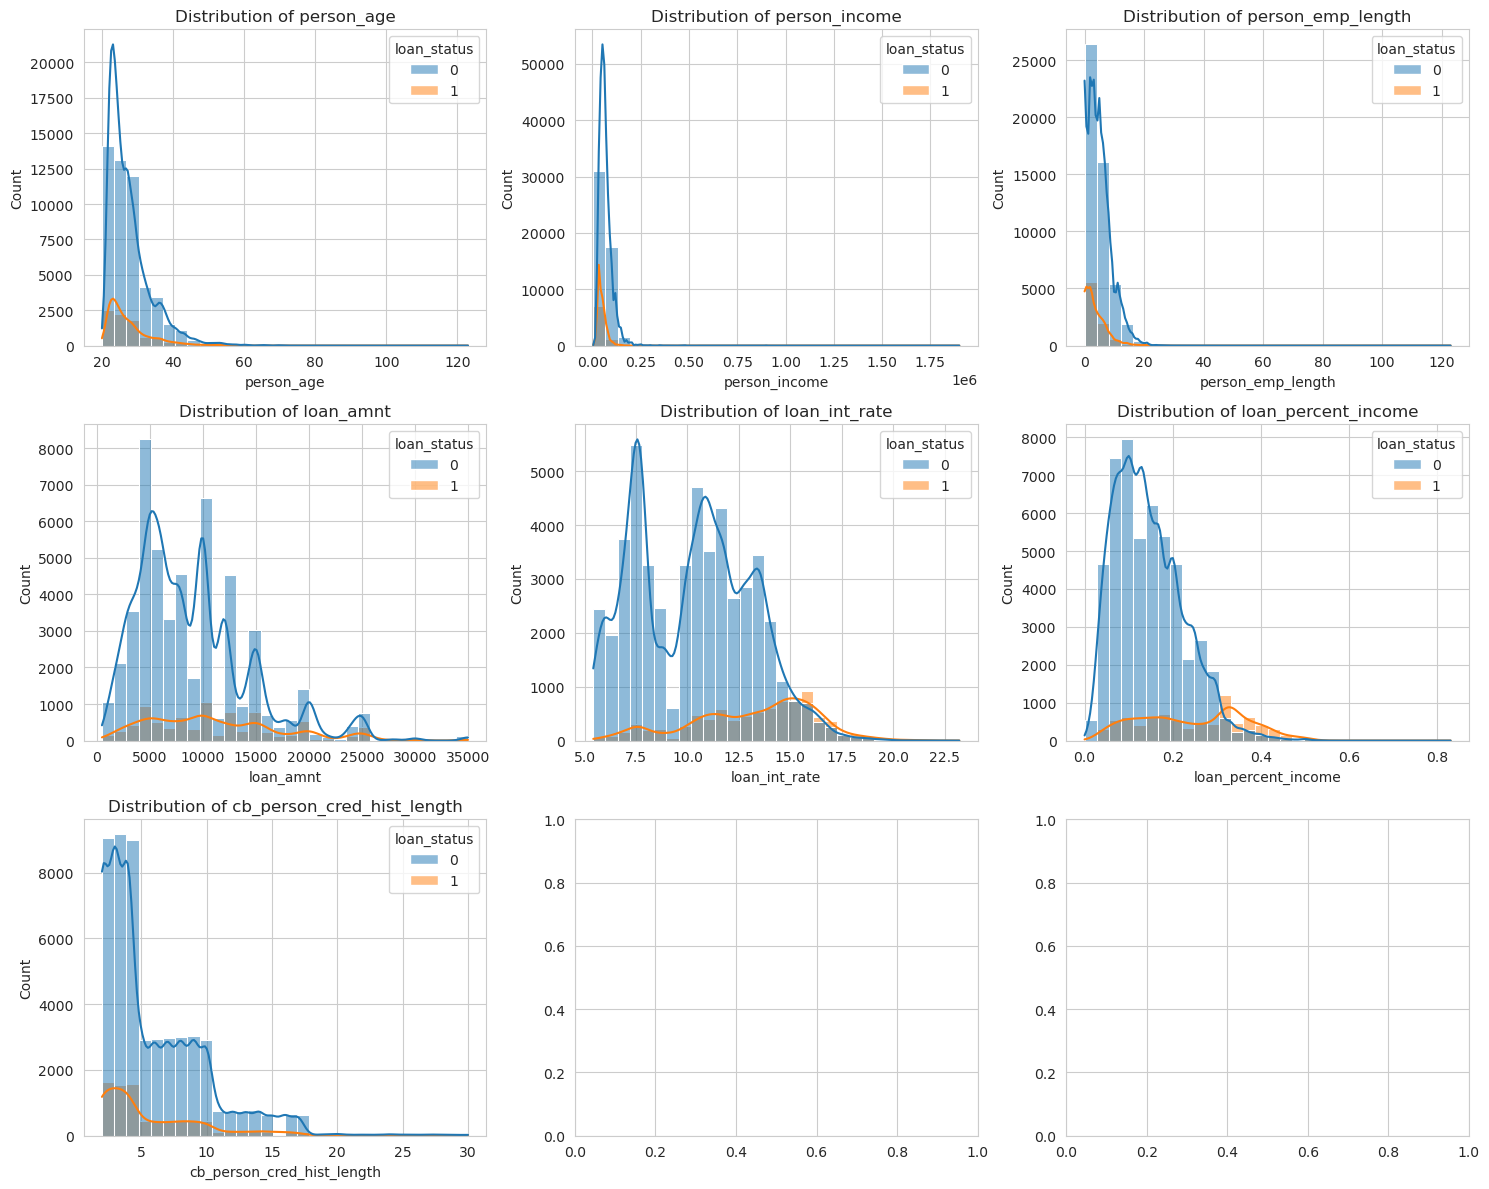

In [63]:
numerical_features = ["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"]
fig, axes = plt.subplots(nrows=len(numerical_features)//2, ncols=len(numerical_features)//2, figsize=(15, 12))
axes = axes.flatten()


for i, feature in enumerate(numerical_features):
    sns.histplot(data=df_train, x=feature, hue="loan_status", bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    
plt.tight_layout()
plt.show()

# 6. Phân phối của các đặc trưng phân loại

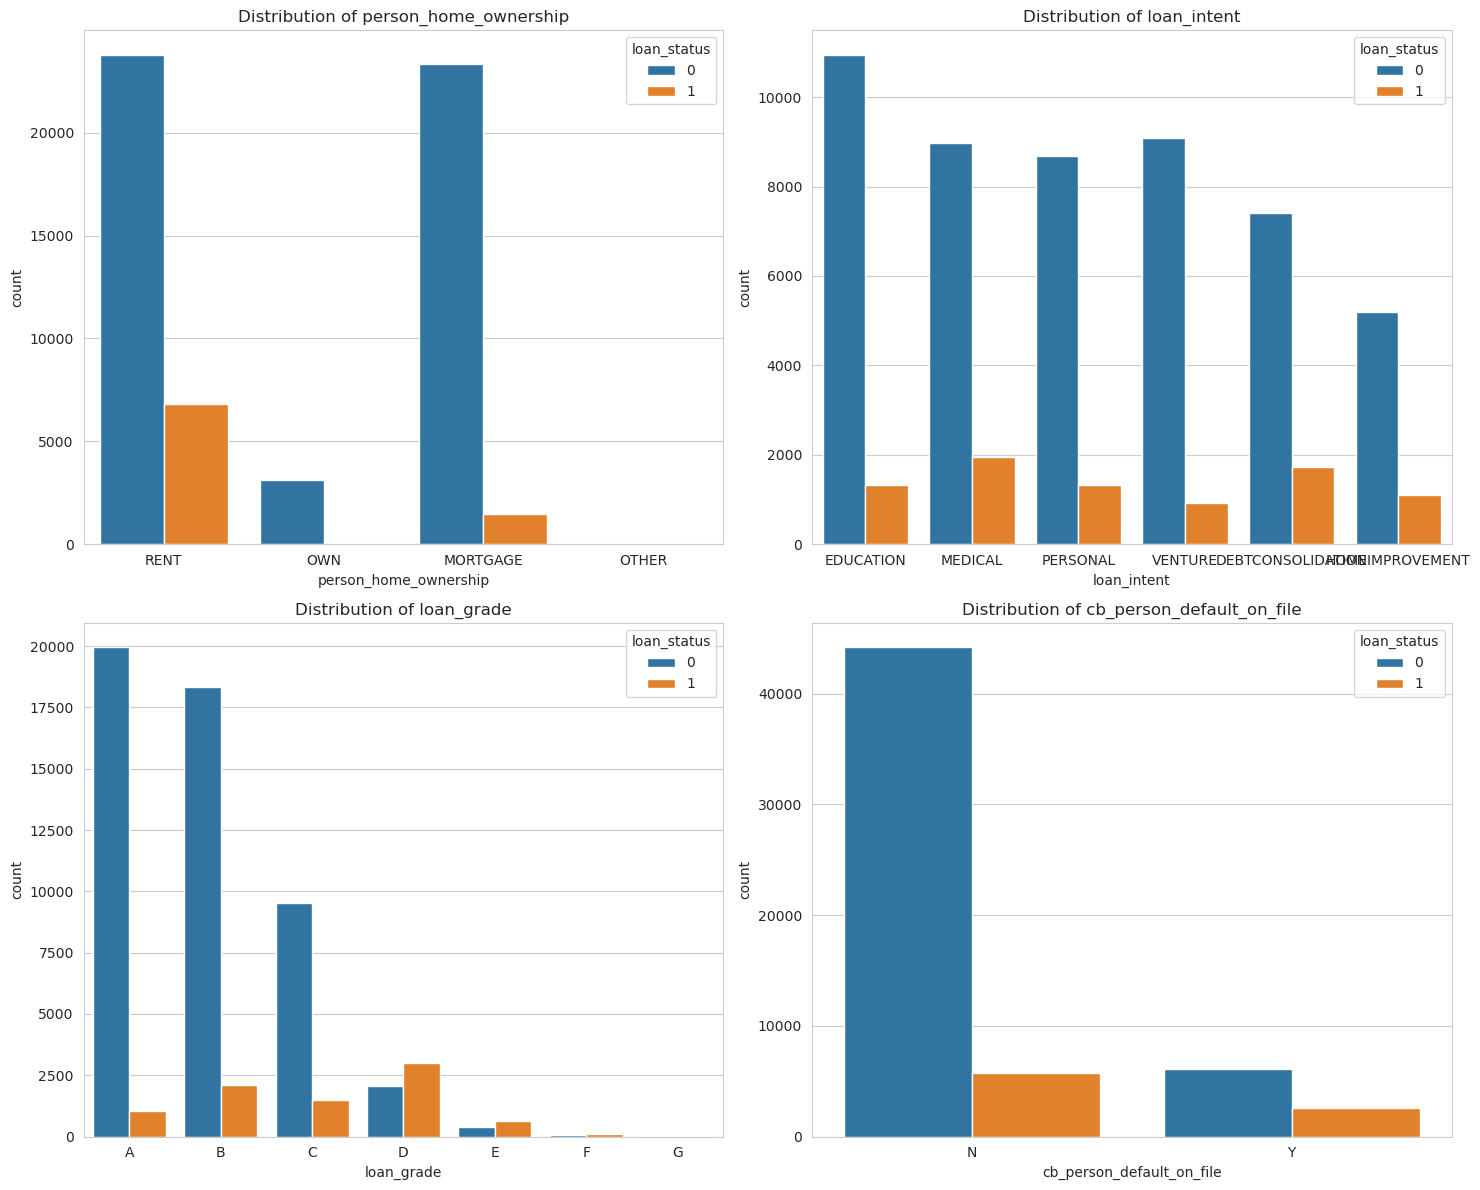

In [64]:
categorical_features = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]
fig, axes = plt.subplots(nrows=len(categorical_features)//2, ncols=len(categorical_features)//2, figsize=(15, 12))
axes = axes.flatten()


for i, feature in enumerate(categorical_features):
    if feature == "loan_grade":
        sns.countplot(data=df_train, x=feature, hue="loan_status",ax=axes[i], order=["A", "B", "C", "D", "E", "F", "G"])
    else:
         sns.countplot(data=df_train, x=feature, hue="loan_status",ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    
plt.tight_layout()
plt.show()

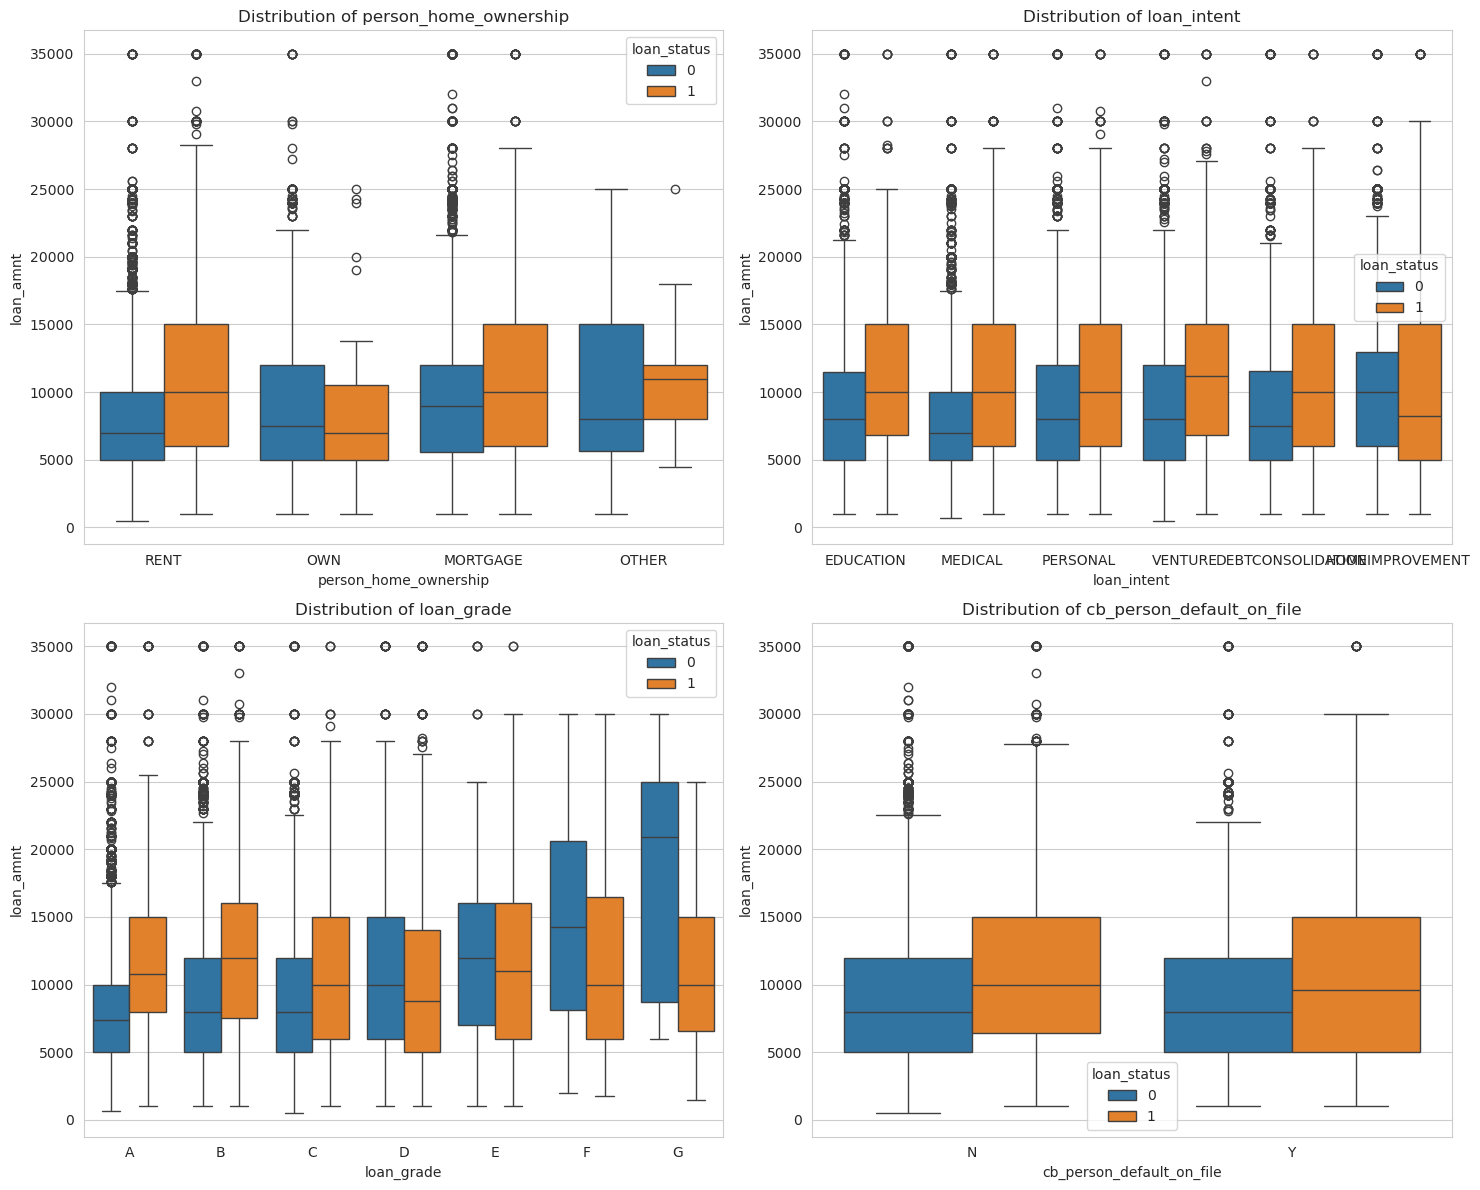

In [65]:
fig, axes = plt.subplots(nrows=len(categorical_features)//2, ncols=len(categorical_features)//2, figsize=(15, 12))
axes = axes.flatten()
order_ = df_train.index

for i, feature in enumerate(categorical_features):
    if feature == "loan_grade":
        sns.boxplot(data=df_train, y="loan_amnt" ,x=feature, hue="loan_status",ax=axes[i], order=["A", "B", "C", "D", "E", "F", "G"])
    else:
        sns.boxplot(data=df_train, y="loan_amnt" ,x=feature, hue="loan_status",ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    
plt.tight_layout()
plt.show()

# 7. Phân tích theo nhóm đặc trưng

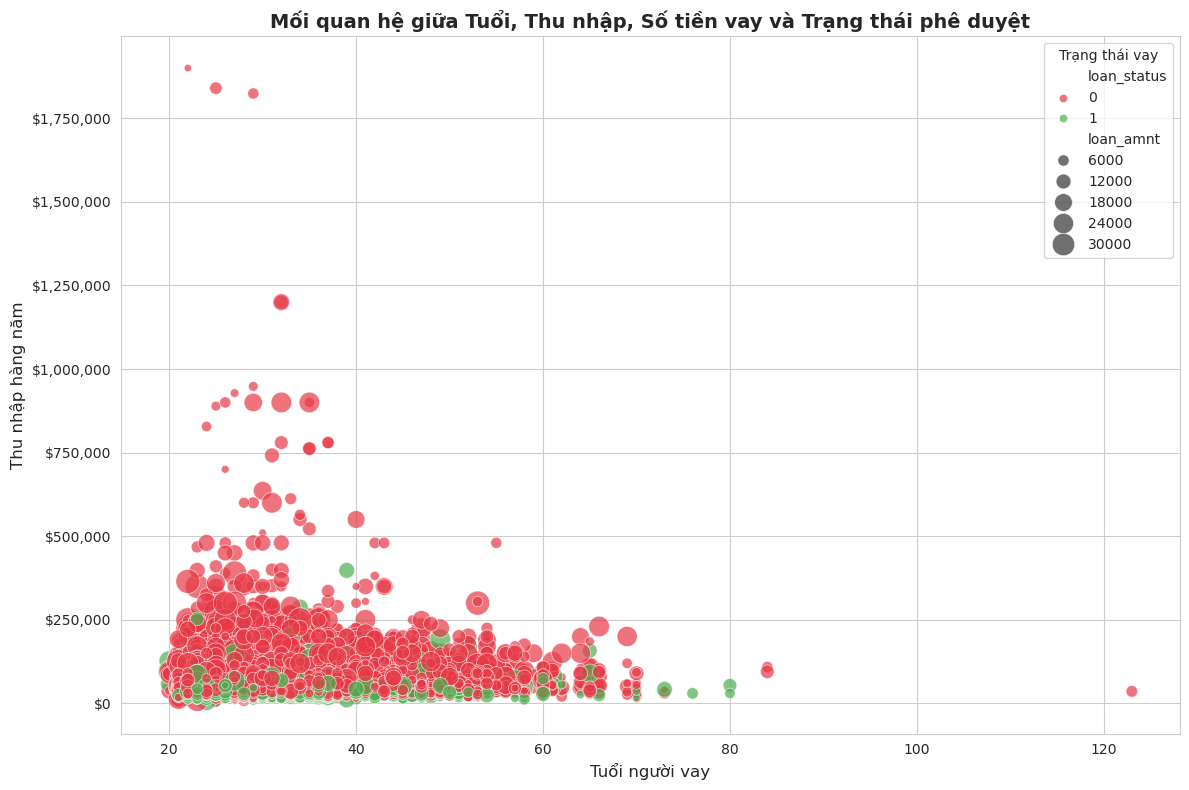

In [66]:
# Tạo biểu đồ mối quan hệ đa chiều giữa độ tuổi, thu nhập, số tiền vay và tỷ lệ chấp thuận
plt.figure(figsize=(12, 8))
    
# Cài đặt style
sns.set_style("whitegrid")

# Tạo scatter plot nâng cao
scatter = sns.scatterplot(
    data=df_train,
    x='person_age',
    y='person_income',
    hue='loan_status',
    size='loan_amnt',
    sizes=(20, 300),
    alpha=0.7,
    palette=['#E63946', '#4CAF50']  # Đỏ cho từ chối, xanh lá cho duyệt
)

# Thêm tiêu đề và nhãn
plt.title('Mối quan hệ giữa Tuổi, Thu nhập, Số tiền vay và Trạng thái phê duyệt', 
          fontsize=14, fontweight='bold')
plt.xlabel('Tuổi người vay', fontsize=12)
plt.ylabel('Thu nhập hàng năm', fontsize=12)

# Định dạng legend
handles, labels = scatter.get_legend_handles_labels()
status_labels = ['Từ chối', 'Được duyệt'] 
plt.legend(title='Trạng thái vay')

# Thêm format tiền cho trục y
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

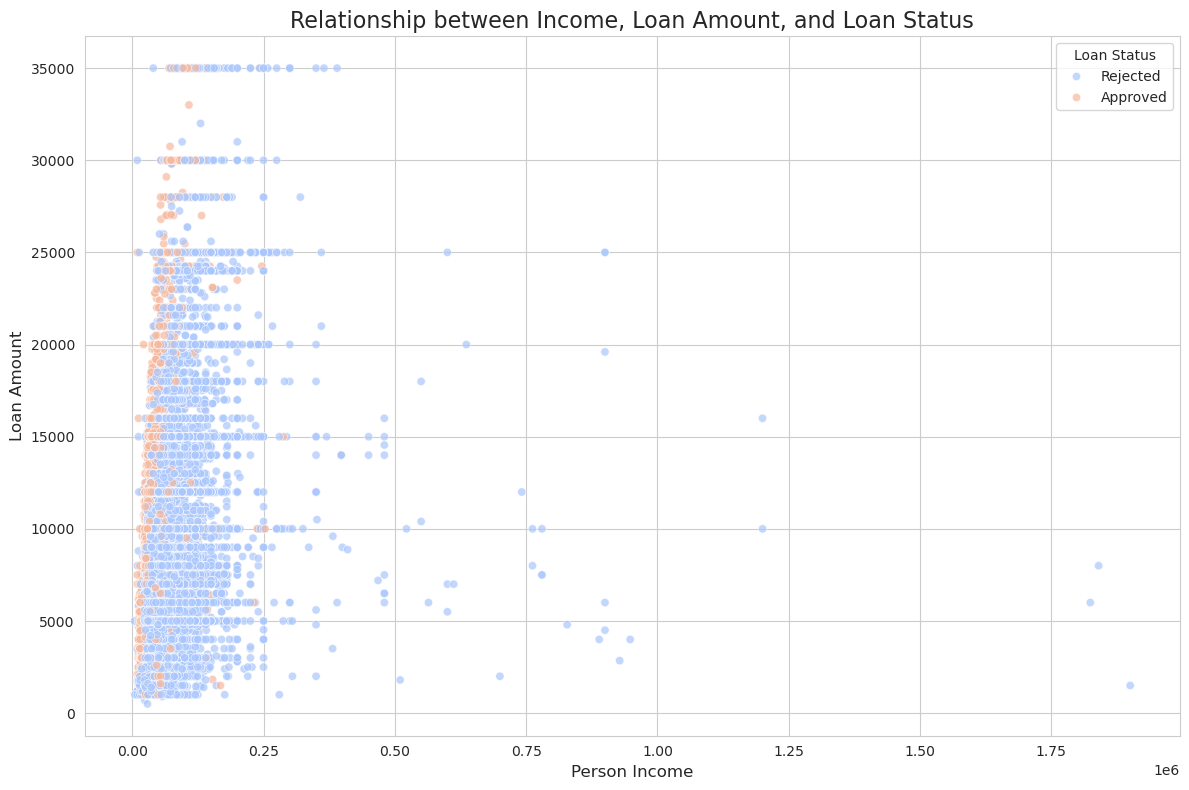

In [76]:
plt.figure(figsize=(12, 8))

# Create a scatter plot to visualize the relationship between person_income, loan_amnt, and loan_status
sns.scatterplot(
    data=df_train,
    x='person_income',
    y='loan_amnt',
    hue='loan_status',
    palette='coolwarm',
    alpha=0.7
)

# Add titles and labels
plt.title('Relationship between Income, Loan Amount, and Loan Status', fontsize=16)
plt.xlabel('Person Income', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)

# Display the legend
plt.legend(title='Loan Status', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

# 8. Ma trận tương quan

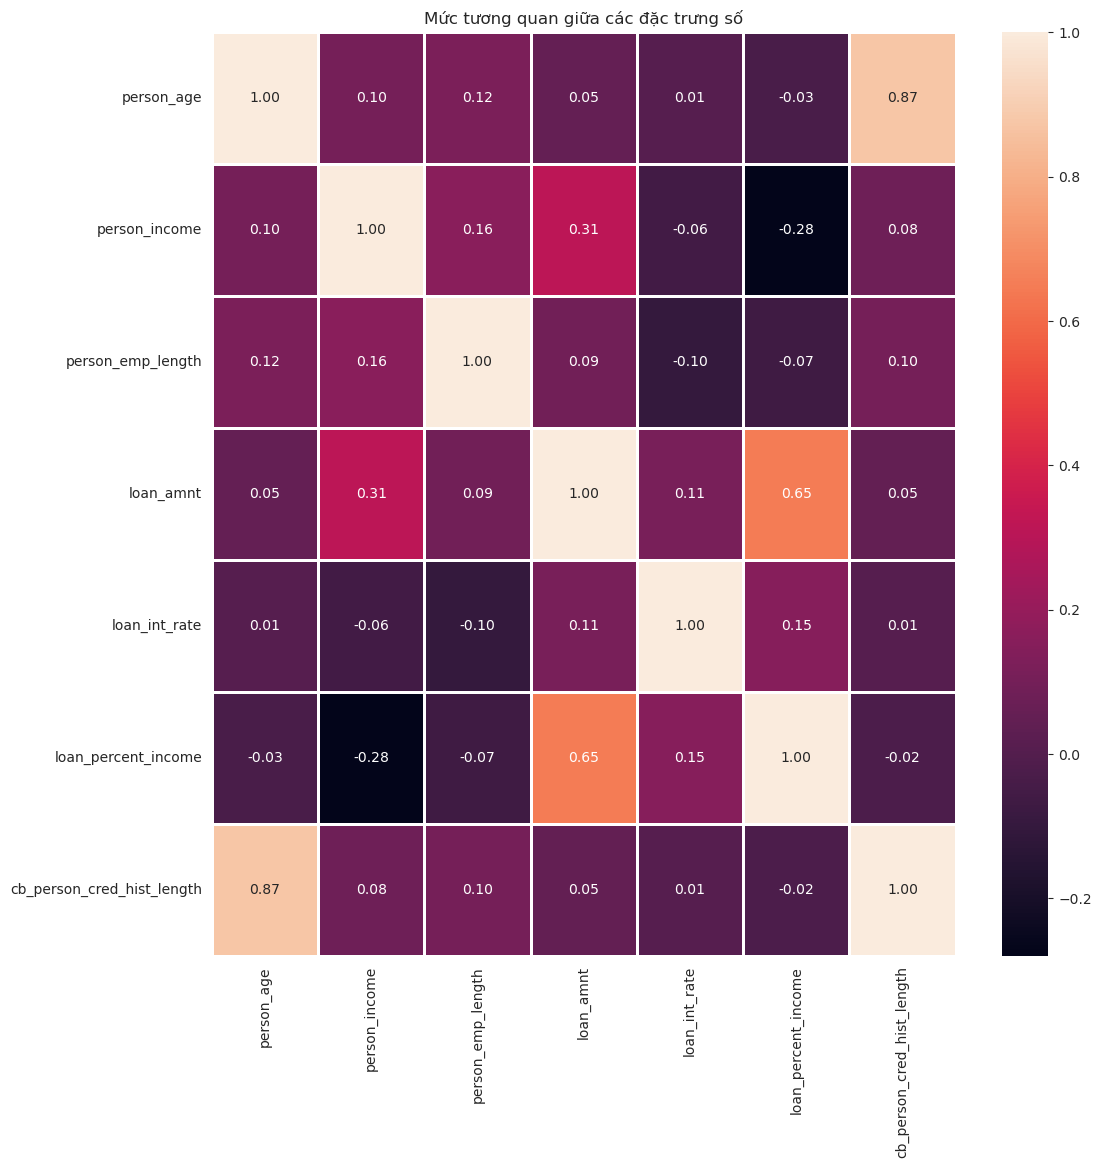

In [ ]:
# Ma trận tương quan giữa các đặc trưng số
plt.figure(figsize=(12,12))
corr_matrix = df_train[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='rocket', fmt='.2f',linecolor='white', linewidths=1)
plt.title('Mức tương quan giữa các đặc trưng số')
plt.show()

- **Nhận xét:**
    - **Cột person_age và cb_person_cred_hist_length:** Có một mối tương quan dương khá mạnh (0.87) giữa độ tuổi của người vay và độ dài lịch sử tín dụng của họ. Điều này hoàn toàn hợp lý vì người lớn tuổi thường có lịch sử tín dụng dài hơn.
    - **loan_amnt (Số tiền vay) và person_income (Thu nhập):** Có một mối tương quan dương trung bình (0.31) giữa số tiền vay và thu nhập. Điều này cũng dễ hiểu vì ngân hàng thường có xu hướng cho những người có thu nhập cao hơn vay số tiền lớn hơn.
    - **loan_amnt (Số tiền vay) và loan_percent_income (Tỷ lệ nợ trên thu nhập)**: Có một mối tương quan dương mạnh (0.65) giữa số tiền vay và tỷ lệ phần trăm thu nhập dùng để trả nợ. Điều này có nghĩa là khi số tiền vay tăng lên, tỷ lệ thu nhập phải trả nợ cũng có xu hướng tăng.
    - **loan_int_rate (Lãi suất) và loan_grade:** Mặc dù loan_grade không phải là một biến số, nhưng chúng ta biết nó có thứ tự (A tốt nhất đến G tệ nhất) và thường có mối tương quan với lãi suất. Lãi suất càng cao thường đi kèm với rủi ro vỡ nợ cao hơn, tương ứng với các grade thấp hơn (D, E, F, G). Heatmap này không trực tiếp thể hiện mối quan hệ đó vì loan_grade là categorical, nhưng loan_int_rate có thể có tương quan với các biến khác.
    - Các mối tương quan yếu: Hầu hết các cặp biến số còn lại có mối tương quan khá yếu (gần 0). Ví dụ, mối tương quan giữa tuổi và thu nhập (0.10) là yếu, và mối tương quan giữa thời gian làm việc và các biến khác cũng không mạnh.
- **Kết luận:
    - Mối tương quan mạnh giữa tuổi và lịch sử tín dụng là một điều tự nhiên.
    - Ma trận tương quan giúp chúng ta xác định các mối quan hệ tuyến tính giữa các biến số.,
